In [1]:
import cv2 as cv
import numpy as np

from img_utils import *
from window_utils import *
from optical_flow_utils import *
from synth_data import generate_synth_data

In [2]:
## prepare the image paths
# create dummy test images 
height = 20
width = 20
data_path = generate_synth_data( img_size=(height, width), 
                                 path='./', 
                                 num_images=4, 
                                 folder_name='synth_data' )

In [3]:
# gather the path params needed in a dictionary
synth_path_params = {'path':data_path, 'image_type':'jpg'}
dimetrodon_path_params = {'path':'./datasets/Dimetrodon', 'image_type':'png'}
rubber_path_params = {'path':'./datasets/RubberWhale', 'image_type':'png'}
car_path_params = {'path':'C:\MY DATA\Code Valley\MATLAB\determining-optical-flow-master\horn-schunck', 'image_type':'png'}
venus_path_params = {'path':'./datasets/Venus', 'image_type':'png'}

path_params = { 'synth':synth_path_params, 
                'dimetrodon':dimetrodon_path_params, 
                'rubber':rubber_path_params, 
                'car':car_path_params,
                'venus':venus_path_params }

In [4]:
## choose an image path
img_paths = get_image_paths(**path_params['venus'])

# read and preprocess
img_1 = preprocess_image(cv.imread(img_paths[0]))
img_2 = preprocess_image(cv.imread(img_paths[1]))

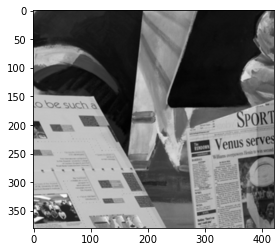

In [5]:
# display img_1
import matplotlib.pyplot as plt
plt.imshow(convert_BGR_to_RGB(img_1))
plt.show()


In [7]:
# set params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# set parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))

In [ ]:
# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
img_gray_1 = convert_to_grayscale(img_1)
p0 = cv.goodFeaturesToTrack(img_gray_1, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(img_1)